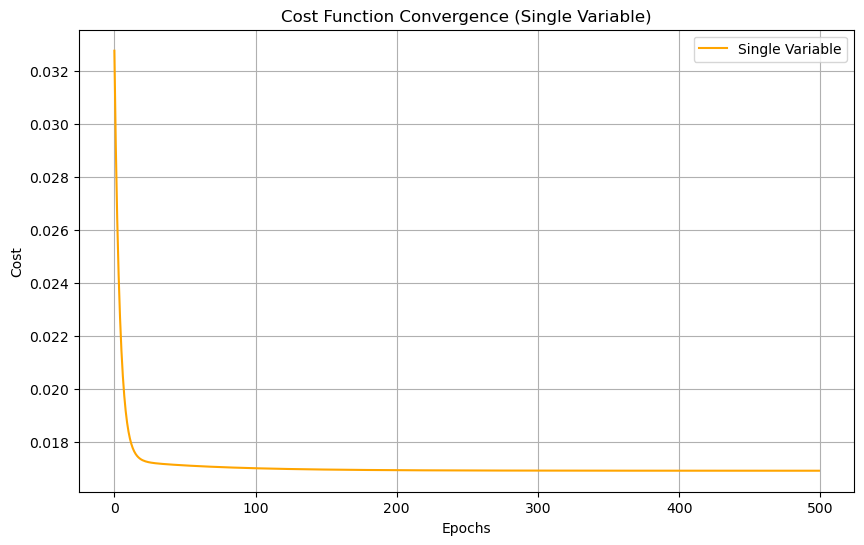

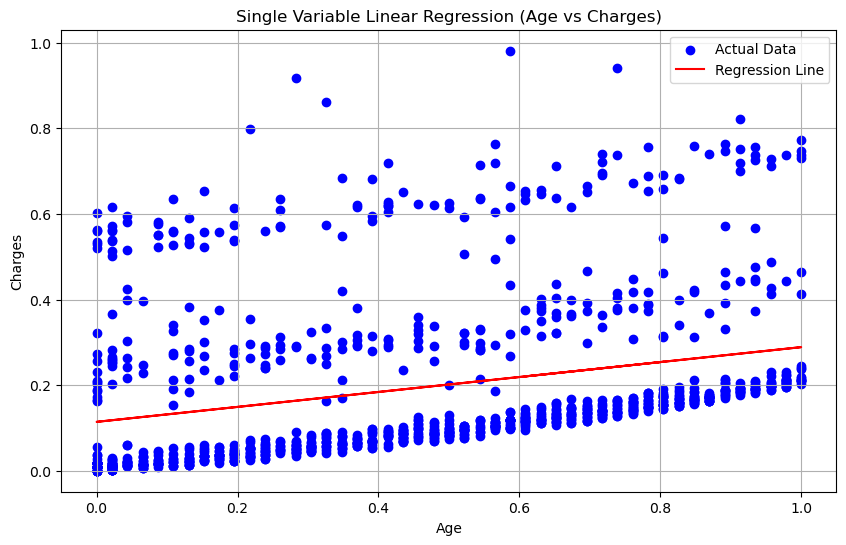

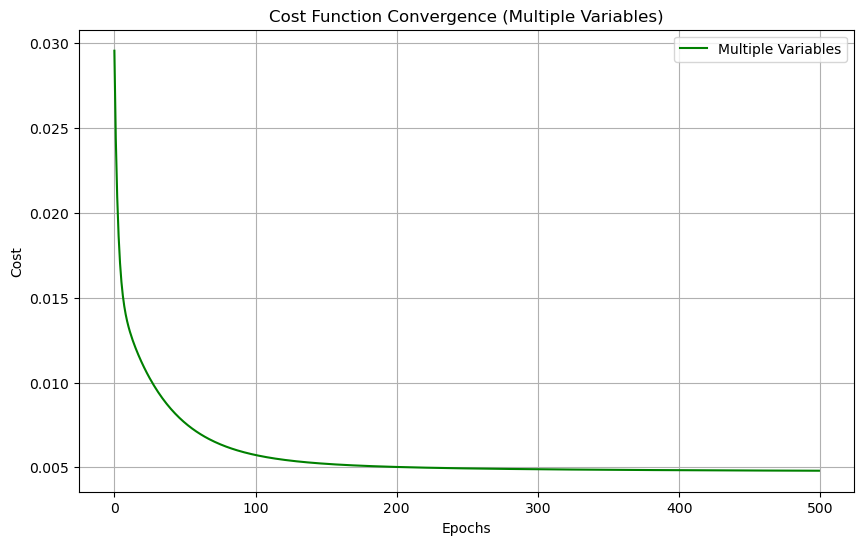

Mean Squared Error (Single Variable): 0.03467288141567377
Mean Squared Error (Multiple Variables): 0.00869154261151986


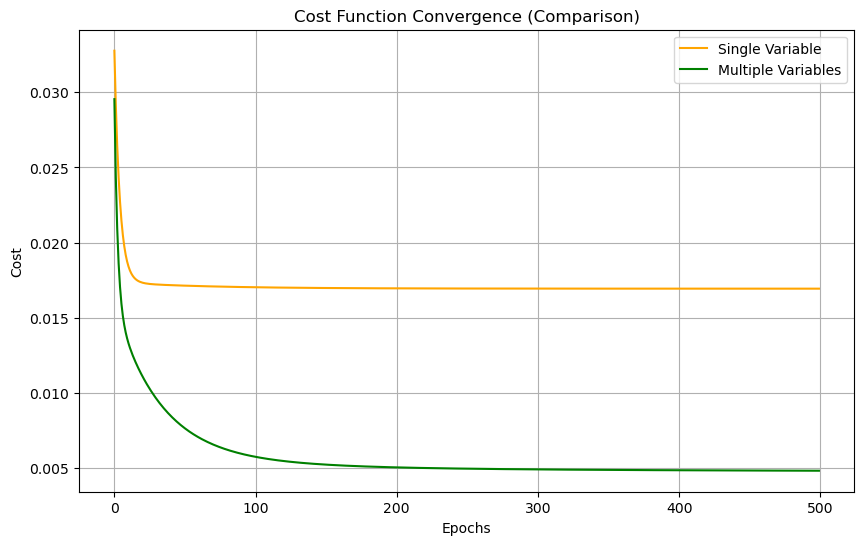

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Read Dataset
df = pd.read_csv('insurance.csv')

# Preprocessing (Ensure all columns are considered)
# Convert categorical columns to numeric 
df = pd.get_dummies(df, columns=['sex', 'smoker', 'region'], drop_first=True)

# Normalize only numeric columns
numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns
for column in numeric_columns:
    df[column] = (df[column] - df[column].min()) / (df[column].max() - df[column].min())

# Ensure all data is numeric
X = df.drop('charges', axis=1).astype(float)
y = df['charges'].astype(float)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Defining Gradient Descent Linear Regression Model
class GradientDescentLinearRegression:
    def __init__(self, learning_rate=0.01, epochs=1000):
        self.learning_rate = learning_rate
        self.epochs = epochs
        self.theta = None
        self.cost_history = []

    def compute_cost(self, X, y):
        m = len(y)
        predictions = X.dot(self.theta)
        cost = (1 / (2 * m)) * np.sum((predictions - y) ** 2)
        return cost

    def fit(self, X, y):
        X = np.c_[np.ones((X.shape[0], 1)), X]  # Add bias term
        self.theta = np.zeros(X.shape[1])
        m = len(y)

        for _ in range(self.epochs):
            predictions = X.dot(self.theta)
            gradients = (1 / m) * X.T.dot(predictions - y)
            self.theta -= self.learning_rate * gradients
            self.cost_history.append(self.compute_cost(X, y))

    def predict(self, X):
        X = np.c_[np.ones((X.shape[0], 1)), X]  # Add bias term
        return X.dot(self.theta)

# Single Variable Linear Regression (Age vs Charges)
X_single = X_train[['age']]
y_single = y_train

single_var_model = GradientDescentLinearRegression(learning_rate=0.1, epochs=500)
single_var_model.fit(X_single.values, y_single.values)

# Plot Convex Function (Cost History) for Single Variable
plt.figure(figsize=(10, 6))
plt.plot(single_var_model.cost_history, color='orange', label='Single Variable')
plt.title('Cost Function Convergence (Single Variable)')
plt.xlabel('Epochs')
plt.ylabel('Cost')
plt.legend()
plt.grid()
plt.show()

# Plot Single Variable Regression Line
plt.figure(figsize=(10, 6))
plt.scatter(X_single, y_single, color='blue', label='Actual Data')
plt.plot(X_single, single_var_model.predict(X_single.values), color='red', label='Regression Line')
plt.title('Single Variable Linear Regression (Age vs Charges)')
plt.xlabel('Age')
plt.ylabel('Charges')
plt.legend()
plt.grid()
plt.show()

# Multiple Variable Linear Regression
X_multi = X_train
y_multi = y_train

multi_var_model = GradientDescentLinearRegression(learning_rate=0.1, epochs=500)
multi_var_model.fit(X_multi.values, y_multi.values)

# Plot Convex Function (Cost History) for Multiple Variables
plt.figure(figsize=(10, 6))
plt.plot(multi_var_model.cost_history, color='green', label='Multiple Variables')
plt.title('Cost Function Convergence (Multiple Variables)')
plt.xlabel('Epochs')
plt.ylabel('Cost')
plt.legend()
plt.grid()
plt.show()

# Predictions for Testing Data
y_pred_single = single_var_model.predict(X_test[['age']].values)
y_pred_multi = multi_var_model.predict(X_test.values)

# Evaluation (Mean Squared Error)
mse_single = mean_squared_error(y_test, y_pred_single)
mse_multi = mean_squared_error(y_test, y_pred_multi)

print(f"Mean Squared Error (Single Variable): {mse_single}")
print(f"Mean Squared Error (Multiple Variables): {mse_multi}")

# Combined Cost Function Plot
plt.figure(figsize=(10, 6))
plt.plot(single_var_model.cost_history, label='Single Variable', color='orange')
plt.plot(multi_var_model.cost_history, label='Multiple Variables', color='green')
plt.title('Cost Function Convergence (Comparison)')
plt.xlabel('Epochs')
plt.ylabel('Cost')
plt.legend()
plt.grid()
plt.show()
